<a href="https://colab.research.google.com/github/mohamedSalehMatar/PRODIGY_ML_3/blob/main/PRODIGY_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [10]:
datatrain= '/content/gdrive/MyDrive/InfoTech/TasksDone/Task3/train'
datatest= '/content/gdrive/MyDrive/InfoTech/TasksDone/Task3/test'

In [11]:
'''Categories=['cats','dogs']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/dog vs cat/dataset/training_set'
#path which contains all the categories of images
for i in Categories:

	print(f'loading... category : {i}')
	path=os.path.join(datadir,i)
	for img in os.listdir(path):
		img_array=imread(os.path.join(path,img))
		img_resized=resize(img_array,(150,150,3))
		flat_data_arr.append(img_resized.flatten())
		target_arr.append(Categories.index(i))
	print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
'''

"Categories=['cats','dogs']\nflat_data_arr=[] #input array\ntarget_arr=[] #output array\ndatadir='/content/dog vs cat/dataset/training_set'\n#path which contains all the categories of images\nfor i in Categories:\n\n\tprint(f'loading... category : {i}')\n\tpath=os.path.join(datadir,i)\n\tfor img in os.listdir(path):\n\t\timg_array=imread(os.path.join(path,img))\n\t\timg_resized=resize(img_array,(150,150,3))\n\t\tflat_data_arr.append(img_resized.flatten())\n\t\ttarget_arr.append(Categories.index(i))\n\tprint(f'loaded category:{i} successfully')\nflat_data=np.array(flat_data_arr)\ntarget=np.array(target_arr)\n"

In [12]:
import os
from skimage.io import imread
from skimage.transform import resize
import random

Categories = ['Cats', 'Dogs']
flat_data_arr = []  # input array
target_arr = []  # output array

for category in Categories:
    print(f'loading... category : {category}')
    path = os.path.join(datatrain, category)
    images = os.listdir(path)
    random_images = random.sample(images, 100)  # Selecting 100 random images from each category
    for img in random_images:
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(category))
    print(f'loaded category:{category} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)


loading... category : Cats
loaded category:Cats successfully
loading... category : Dogs
loaded category:Dogs successfully


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape


(200, 67501)

In [15]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]


In [16]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
											random_state=77,
											stratify=y)


In [17]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
			'gamma':[0.0001,0.001,0.1,1],
			'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)


In [18]:
# Training the model using the training data
model.fit(x_train,y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [19]:
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")


The model is 55.00000000000001% accurate


In [20]:
print(classification_report(y_test, y_pred, target_names=['Cats', 'Dogs']))


              precision    recall  f1-score   support

        Cats       0.57      0.40      0.47        20
        Dogs       0.54      0.70      0.61        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.54        40
weighted avg       0.55      0.55      0.54        40



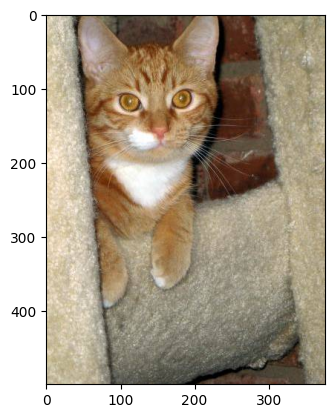

Cats = 52.970785252369836%
Dogs = 47.02921474763015%
The predicted image is : Dogs


In [33]:
path='/content/gdrive/MyDrive/InfoTech/TasksDone/Task3/test/15.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
	print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
